<img src = "img/3.png">

In [2]:
import keras
from keras.models import Sequential #序列模型
from keras.layers import Dense  #全连接层
from keras.optimizers import SGD

Using TensorFlow backend.


In [14]:
from data_loader import load_data
(x_train, y_train), (x_test, y_test)=load_data()

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(402, 64, 64, 3)
(402, 1)
(40, 64, 64, 3)
(40, 1)


In [23]:
import matplotlib.pyplot as plt
index = 1
plt.imshow(x_train[index])

In [25]:
x_train = x_train.reshape(402,64*64*3) #当不知道图片信息时，使用reshape(x_train.shape[0],-1),-1的意思就是将剩余的值相乘
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train[0])
print(x_test.shape)

[0.73351524 0.69822112 0.70214269 ... 0.86685049 0.84699755 0.87990005]
(40, 12288)


In [29]:
model=Sequential()
model.add(Dense(128,activation="relu",input_shape=(12288,)))
#128的意思是将输入的12288个数字通过特征的构造。构造出一个128的特征向下传递
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1572992   
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,583,361
Trainable params: 1,583,361
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer=SGD(),loss="binary_crossentropy",metrics=['accuracy'])

In [31]:
model.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test))

Train on 402 samples, validate on 40 samples
Epoch 1/4
402/402 [==============================] - 2s 6ms/step - loss: 0.7019 - accuracy: 0.4925 - val_loss: 0.6810 - val_accuracy: 0.5750
Epoch 2/4
402/402 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5075 - val_loss: 0.6828 - val_accuracy: 0.6500
Epoch 3/4
402/402 [==============================] - 1s 2ms/step - loss: 0.6844 - accuracy: 0.5746 - val_loss: 0.6721 - val_accuracy: 0.6750
Epoch 4/4
402/402 [==============================] - 1s 2ms/step - loss: 0.6772 - accuracy: 0.5796 - val_loss: 0.6729 - val_accuracy: 0.6750


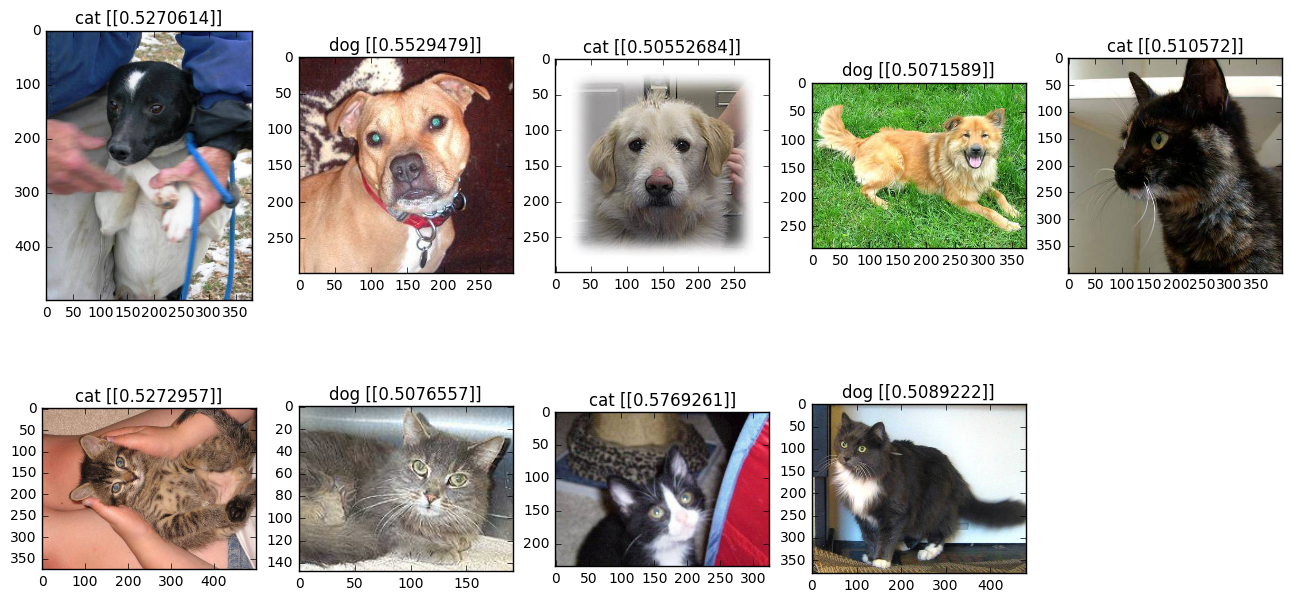

40/40 [==============================] - 0s 1ms/step


[0.6728678464889526, 0.675000011920929]

In [56]:
from skimage.transform import resize
import numpy as np
fig=plt.figure(figsize=(16, 16)) 
for i in range(1, 10):
    my_image =  'images/test/{}.jpg'.format(i)
    my_image = np.array(plt.imread(my_image)) #np.array转化为矩阵
    ax = fig.add_subplot(4, 5, i) #把区域分割成4行5列，其中该区域为分割后的第i块
    plt.imshow(my_image)
   
    num_px = 64
    my_image = resize(my_image, (num_px, num_px)) #对分辨率进行缩放64*64
    my_image = my_image.reshape(1, -1) 
    a = model.predict(my_image)
    if  a > 0.5:
        ax.title.set_text('cat {}'.format(a))
    else:
        ax.title.set_text('dog {}'.format(1 - a))
plt.show()
model.evaluate(x_test, y_test)